In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_FashionMNIST

In [3]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\IAML-CW2\\data")

In [4]:
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

In [5]:
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

In [6]:
Xmean = Xtrn.mean(0)

In [7]:
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [8]:
Xtrn_nm[0, :4], Xtrn_nm[-1, :4]

(array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]),
 array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]))

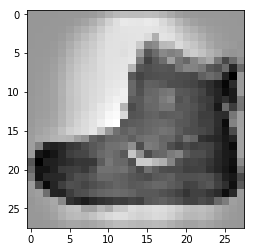

In [9]:
plt.imshow(Xtrn_nm[0].reshape((28, 28)), cmap='gray_r')

In [10]:
class_means = []
class_cf_samples = {i : None for i in range(10)}

for c in range(10):
    indices = np.where(Ytrn == c)[0]
    Xclass = np.take(Xtrn_nm, indices, 0)
    
    class_means.append(Xclass.mean(0))
    
    cdists = sorted(zip(indices ,np.apply_along_axis(lambda x: np.linalg.norm(x-class_means[c]), 1, Xclass)), key = lambda x: x[1])
    
    class_cf_samples[c] = [d[0] for d in cdists[:2] + cdists[-2:]]
    

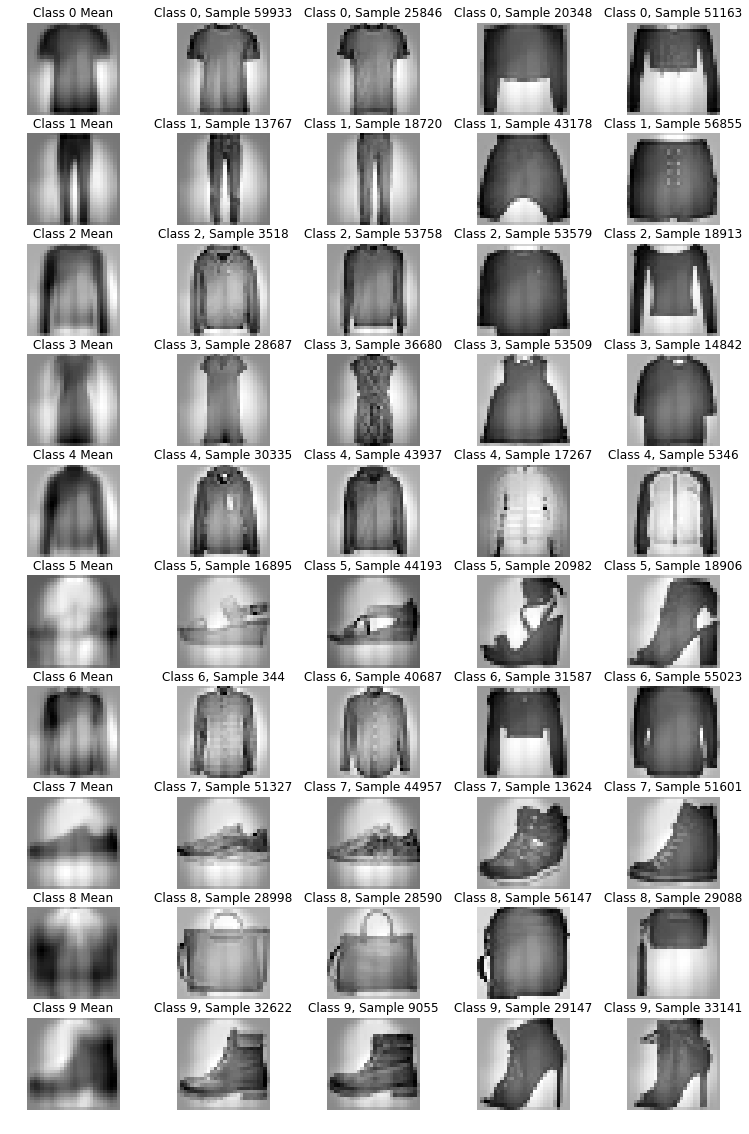

In [11]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize = (13, 20))

for row in range(10):
    for col in range(5):
        plt.sca(ax[row, col])
        
        if col == 0:
            plt.imshow(class_means[row].reshape((28, 28)), cmap = "gray_r")
            plt.title(f"Class {row} Mean")
        
        else:
            img = class_cf_samples[row][col-1]
            plt.imshow(Xtrn_nm[img].reshape(28, 28), cmap = "gray_r")
            plt.title(f"Class {row}, Sample {img}")
        plt.axis("off")

In [12]:
from sklearn.decomposition import PCA

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [13]:
pca = PCA()

In [14]:
pca.fit(Xtrn_nm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
evar = pca.explained_variance_
evar[:5]

array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022])

In [20]:
np.cumsum(evar)

array([19.80980567, 31.92201614, 36.02817275, 39.41000114, 42.03477137,
       44.39561814, 45.99305849, 47.29288208, 48.21371016, 49.11026897,
       49.78758257, 50.4105813 , 50.93298506, 51.38301903, 51.79767897,
       52.20003983, 52.57655504, 52.93435518, 53.2468447 , 53.55758499,
       53.85343263, 54.13114393, 54.39361583, 54.6477607 , 54.89409828,
       55.13330681, 55.36063527, 55.5784942 , 55.78864658, 55.9887097 ,
       56.1767187 , 56.35753706, 56.53742863, 56.71195282, 56.87991243,
       57.04083814, 57.19793592, 57.35178141, 57.50082002, 57.64361547,
       57.78024291, 57.91377141, 58.04658342, 58.17127335, 58.29089545,
       58.40817903, 58.52332432, 58.63518368, 58.74495091, 58.85058303,
       58.95447496, 59.05683133, 59.15697134, 59.25473527, 59.34906419,
       59.44251987, 59.53198994, 59.61988546, 59.70669156, 59.79254405,
       59.87539577, 59.95739205, 60.03798623, 60.11729403, 60.19614165,
       60.27274665, 60.34851929, 60.42333271, 60.49504818, 60.56

Text(0,0.5,'Cumulative Explained Variance Ratio')

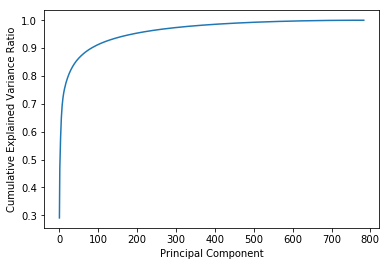

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance Ratio")

In [29]:
from sklearn.metrics import mean_squared_error

table = []

for k in (5, 20, 50, 200):
    pca_k = PCA(k)
    pca_k.fit(Xtrn_nm)
    row = []
    for c in range(10):
        X = Xtrn_nm[np.where(Ytrn == c)[0]]
        Xt = pca_k.inverse_transform(pca_k.transform(X))
        row.append(np.sqrt(mean_squared_error(X, Xt)))
    table.append(row)
table

[[0.18966539662119983,
  0.16820811843128974,
  0.17760639954431023,
  0.17218379200503117,
  0.17384104641677153,
  0.19252332291549898,
  0.17172048849261726,
  0.1614054898852178,
  0.22261846281769546,
  0.19003606232538228],
 [0.12688597530158363,
  0.11983276112226653,
  0.12865522571375707,
  0.12888066317982413,
  0.12678346744876456,
  0.16503632398398022,
  0.12810988848668015,
  0.1270121583539587,
  0.16203819779289005,
  0.1457887392717728],
 [0.10078719719086286,
  0.08795324375041325,
  0.09780442850052284,
  0.10213565280125511,
  0.09878671495888955,
  0.13420749919357006,
  0.10295833981412278,
  0.10118798053087145,
  0.1366886805694555,
  0.11960049762053526],
 [0.05955998923443043,
  0.04277615119339272,
  0.053731805239718496,
  0.05812058131807728,
  0.05620095596414452,
  0.07975552980940379,
  0.06285362175389997,
  0.060067654447727804,
  0.0836067207074021,
  0.07040557900322833]]